In [1]:
import pandas as pd
import numpy as np
from scipy import stats

### Loading Data

In [2]:
covid_data_path = "../../data/time_series_covid19_deaths_US.csv"

In [3]:
covid_data_df = pd.read_csv(covid_data_path)

In [4]:
covid_data_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,115,117,122,122,123,124,124,125,126,126
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [5]:
list(covid_data_df.columns)

['UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key',
 'Population',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 

In [6]:
covid_data_df.Combined_Key.head()

0              American Samoa, US
1                        Guam, US
2    Northern Mariana Islands, US
3                 Puerto Rico, US
4              Virgin Islands, US
Name: Combined_Key, dtype: object

In [7]:
num_samples = len(covid_data_df)

### Detecting Duplicates

In [8]:
duplicated_all_columns = covid_data_df.duplicated(subset=None, keep='first')

In [9]:
duplicated_all_columns.sum()

0

In [10]:
duplicated_UID = covid_data_df.duplicated(subset='UID')
duplicated_UID.sum()

0

In [11]:
df = covid_data_df.iloc[:,11:]

In [12]:
df.head()

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,55641,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,164229,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,55144,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,2933408,0,0,0,0,0,0,0,0,0,...,115,117,122,122,123,124,124,125,126,126
4,107268,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


### 60 days data + removing rows with number of deaths < 60

In [13]:
df_up_to_May_1st = df.iloc[:, :102]

In [14]:
rows_to_keep = df_up_to_May_1st.iloc[:,1:].sum(axis=1)

In [15]:
rows_to_keep = df[rows_to_keep >=20]
len(rows_to_keep)

1185

In [16]:
df_up_to_May_5st = df.iloc[:, :105]
rows_to_keep = df_up_to_May_5st.iloc[:,1:].sum(axis=1)
rows_to_keep = df[rows_to_keep >=20]
len(rows_to_keep)

1259

In [17]:
df_60_days = df.iloc[:,60:121]

In [18]:
df_60_days.head()

,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,1,1,2,2,2,2,3,3,3,6,...,113,114,115,117,122,122,123,124,124,125
4,0,0,0,0,0,0,0,0,0,0,...,5,6,6,6,6,6,6,6,6,6


In [19]:
df_60_days = df_60_days[df_60_days.sum(axis=1)>=100]
len(df_60_days)

889

In [20]:
#df_mask_0 = df_60_days == 0 
#df_sum_0 = df_mask_0.sum(axis=0) / len(df_60_days)
#df_mask_half = df_sum_0[df_sum_0<=0.5]
#df_mask_half.head()

In [21]:
df_sum = df_60_days.sum(axis=1).sort_values()
df_sum.head(10)

1130    100
2311    100
3061    100
241     100
920     100
210     100
421     100
2194    101
2998    101
2848    101
dtype: int64

### Plotting samples

In [22]:
import matplotlib.pyplot as plt

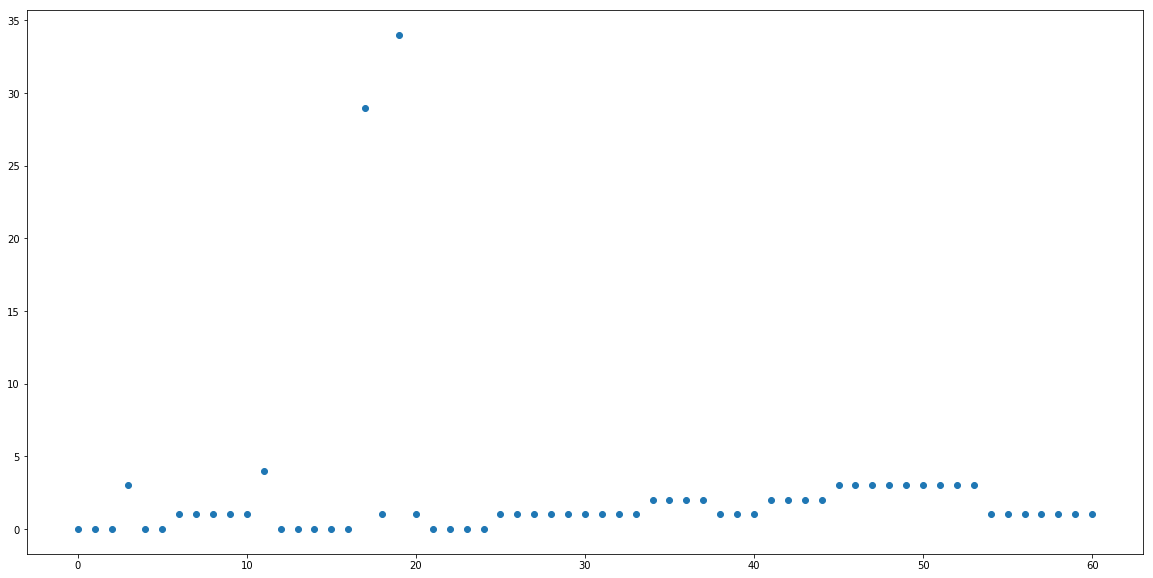

In [23]:
random_sample = np.random.randint(0, len(df_60_days))
#print(df_60_days.iloc[random_sample,:])
plt.figure(figsize=(20, 10))
plt.scatter(x=range(61), y=df_60_days.iloc[866,:])

In [24]:
### plot for small number of deaths
df_low_death = df_60_days.sum(axis=1).sort_values().iloc[:10]
list_ind = list(df_low_death.index)
list_ind

[1130, 2311, 3061, 241, 920, 210, 421, 2194, 2998, 2848]

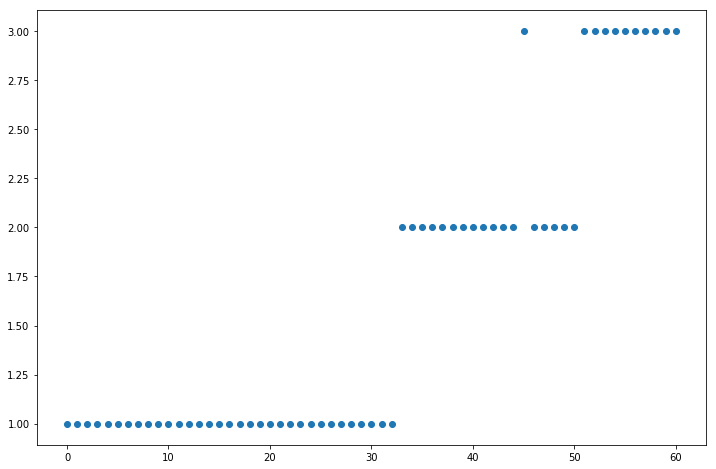

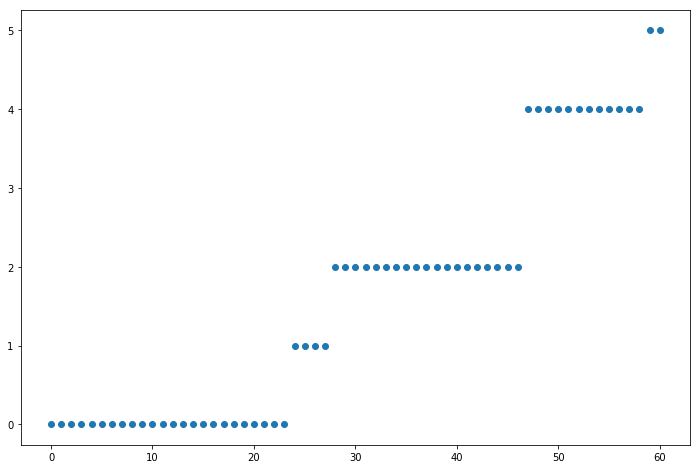

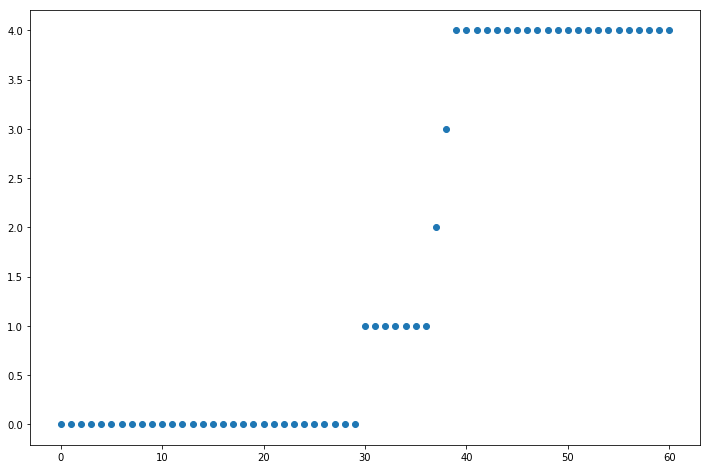

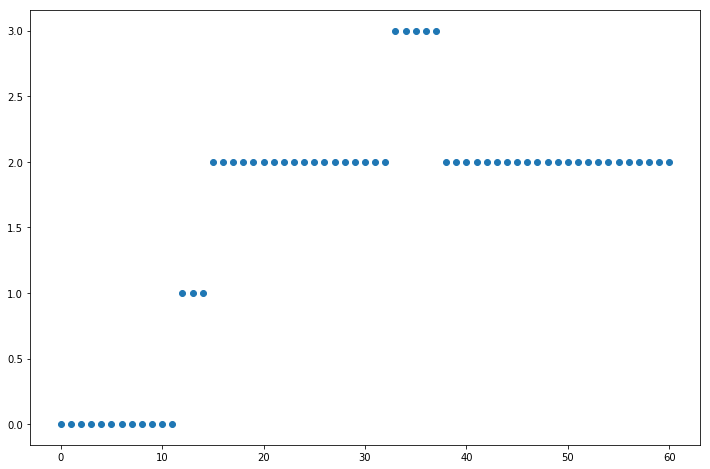

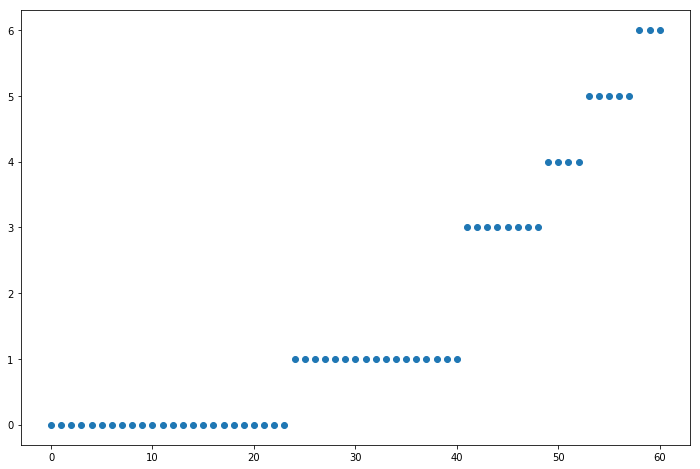

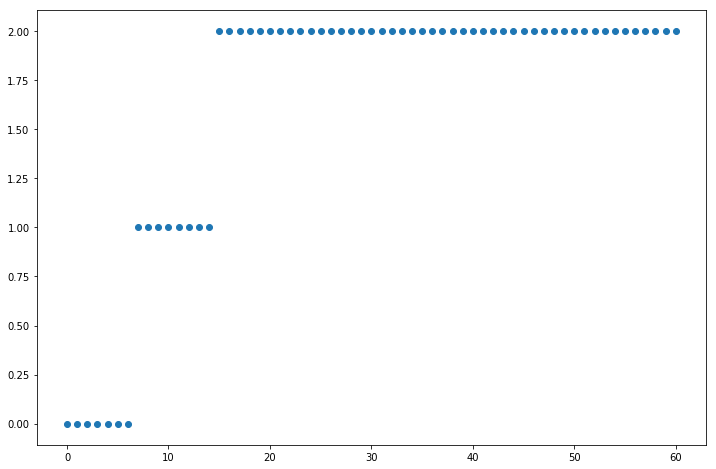

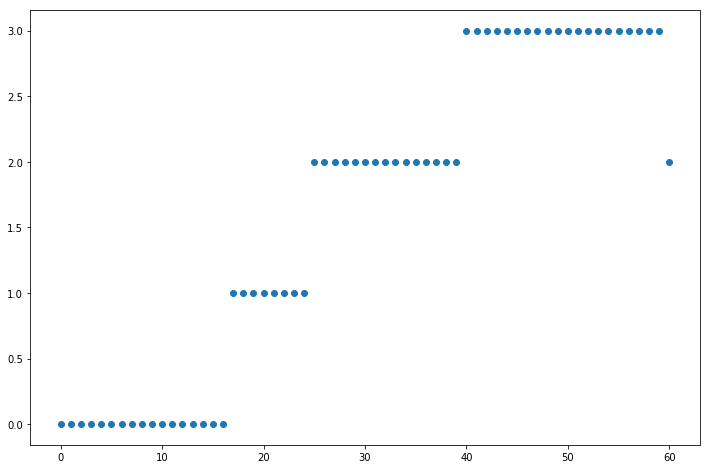

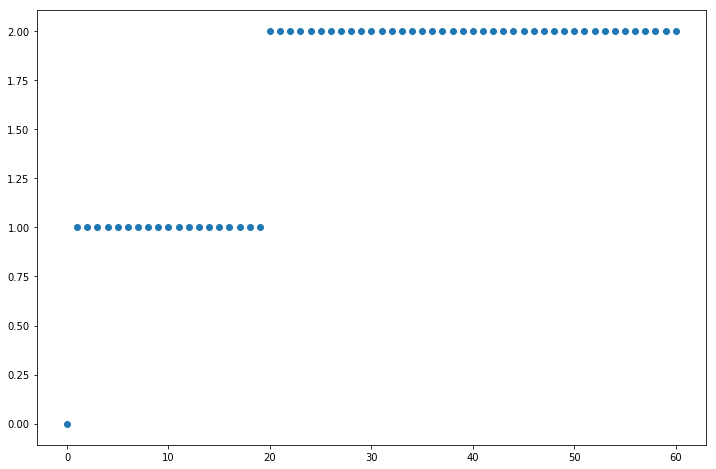

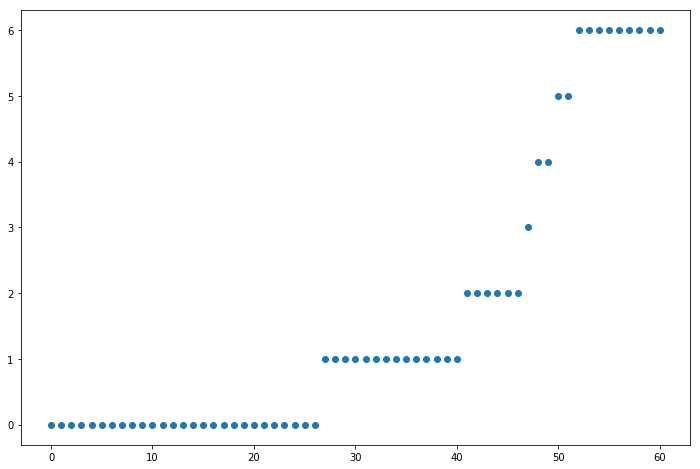

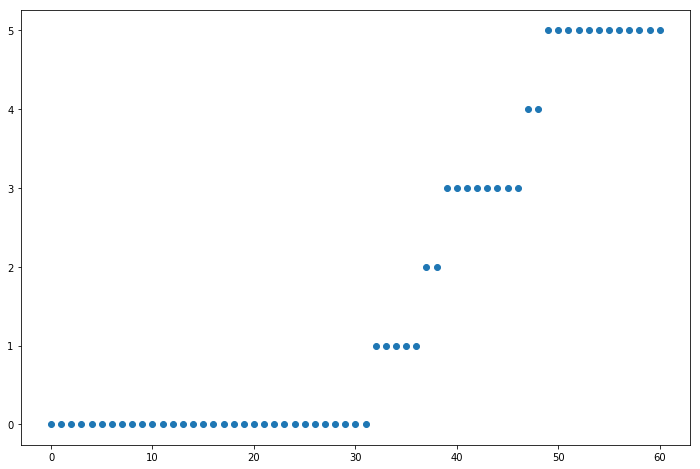

In [25]:
for i in list_ind: 
    plt.figure(figsize=(12, 8))
    plt.scatter(x=range(61), y=df_60_days.loc[i,:])

### Detecting outliers

In [26]:
z = np.abs(stats.zscore(df_60_days, axis=1))

In [27]:
z.shape

(889, 61)

In [28]:
outliers = np.where((z > 6))

In [29]:
outliers

(array([867, 868]), array([18, 24]))

In [30]:
print(df_60_days.iloc[866,:].name)
df_60_days.iloc[866,:].sort_values(ascending=False).head()

3206


4/9/20     34
4/7/20     29
4/1/20      4
5/8/20      3
5/10/20     3
Name: 3206, dtype: int64

In [31]:
print(df_60_days.iloc[867,:].name)
df_60_days.iloc[867,:].sort_values(ascending=False).head()

3207


4/8/20     52
4/23/20     6
4/24/20     6
4/25/20     6
5/13/20     5
Name: 3207, dtype: int64

In [32]:
df_60_days = df_60_days.drop(index=[3207, 3210], axis=0)

In [33]:
len(df_60_days)

887

In [34]:
df_60_days.iloc[-1,:].name

3253

In [35]:
covid_data_df.iloc[3253,:].Combined_Key

'Michigan Department of Corrections (MDOC), Michigan, US'

In [36]:
df_60_days.iloc[798+41,:].name

2996

In [37]:
covid_data_df.iloc[2996,:].Combined_Key

'Yakima, Washington, US'

In [37]:
covid_data_df.iloc[2877,:].Combined_Key

'Loudoun, Virginia, US'

In [38]:
df_60_days.iloc[798+76,:].name

3228

In [38]:
df_60_days.iloc[798+67,:].name

3203

In [39]:
covid_data_df.iloc[3203,:].Combined_Key

'Unassigned, Arizona, US'

In [39]:
covid_data_df.iloc[3228,:].Combined_Key

'Unassigned, Nebraska, US'

In [40]:
df_60_days.iloc[798+2,:].name

2853

In [41]:
covid_data_df.iloc[2853,:].Combined_Key

'Fairfax, Virginia, US'

In [42]:
df_60_days.iloc[798+66,:].name

3202

In [43]:
covid_data_df.iloc[3202,:].Combined_Key

'Unassigned, Alaska, US'

In [44]:
df_60_days.iloc[798+7,:].name

2867

In [45]:
covid_data_df.iloc[2867,:].Combined_Key

'Henrico, Virginia, US'

In [46]:
df_60_days.iloc[798+73,:].name

3221

In [47]:
covid_data_df.iloc[3221,:].Combined_Key

'Unassigned, Maryland, US'

In [48]:
df_60_days.iloc[798+72,:].name

3219

In [49]:
covid_data_df.iloc[3221,:].Combined_Key

'Unassigned, Maryland, US'

In [50]:
df_60_days.iloc[798+77,:].name

3229

In [51]:
covid_data_df.iloc[3229,:].Combined_Key

'Unassigned, Nevada, US'

### saving data as a numpy_array. 

In [34]:
final_arr = df_60_days.values

In [35]:
final_arr.shape

(887, 61)

In [36]:
arr_path = "../../data/covid_preprocess.npy"
np.save(file=arr_path, arr=final_arr)

In [37]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#arr_transpose = np.transpose(final_arr)
#arr_transpose[:, 0]
#scaler = MinMaxScaler()
#arr_transpose_norm = scaler.fit_transform(arr_transpose)
#arr_transpose_norm[:,0]
#arr_transpose_norm[:,10]
#stand_scaler = StandardScaler()
#arr_transpose_norm_2 = stand_scaler.fit_transform(arr_transpose)
#arr_transpose_norm_2[:, 0]
#arr_transpose_norm_2[:, 10]